Ejercicio de Regresión logística

In [53]:
#Se importan las librerías necesarias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [18]:
#Se genera la variable que llama al csv a través de pandas
reglog = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [19]:
#Se visualiza un determinado número de filas en el archivo para comprobar si se cargó correctamente
reglog.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [27]:
#Analizar los resultados agrupados por genero
print(reglog.groupby('Gender').size())

Gender
Female    185
Male      189
dtype: int64


C:\Users\L17J\AppData\Local\Temp\ipykernel_12880\1676447519.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  reglog.drop(['Age'],1).hist()


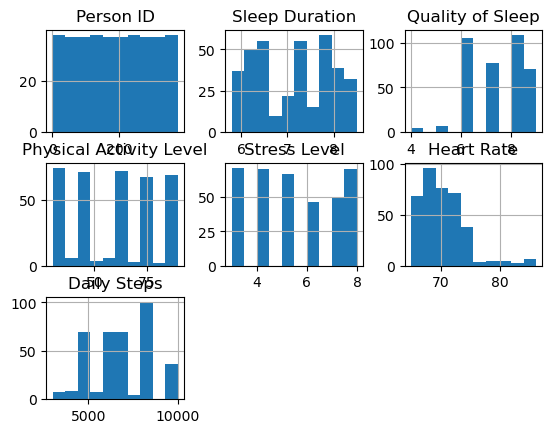

In [111]:
#Visualizar datos en formato de historial
reglog.drop(['Age'],1).hist()
plt.show()

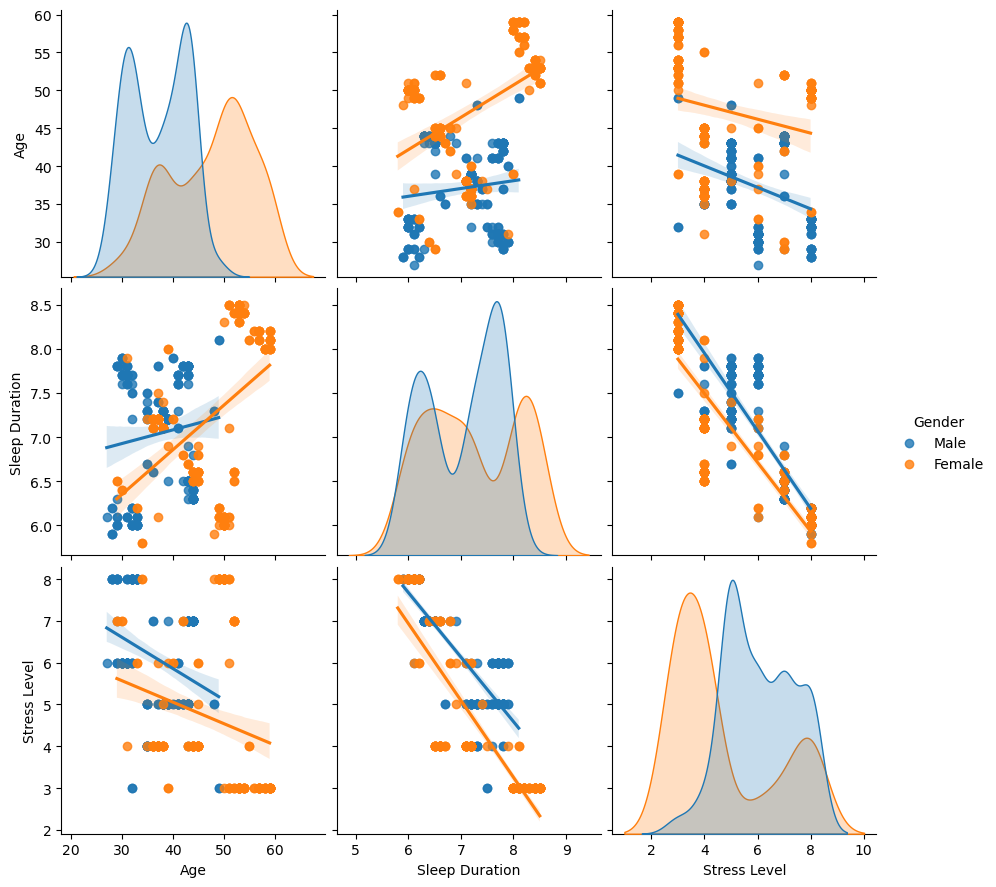

In [47]:
#Interrelacionar entradas por genero
sb.pairplot(reglog.dropna(), hue='Gender',height=3,vars=["Age", "Sleep Duration","Stress Level"],kind='reg')

In [72]:
X = np.array(reglog.drop(['Age'],1))
y = np.array(reglog['Age'])
X.shape

C:\Users\L17J\AppData\Local\Temp\ipykernel_12880\910940165.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(reglog.drop(['Age'],1))


(374, 12)

In [113]:
# Preparar datos para la regresión logística
X = reglog[['Age']]  # Variable independiente
y = reglog['Gender']  # Variable dependiente

In [114]:
# Dividir datos en conjuntos de entrenamiento(70%) y prueba(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [115]:
# Estandarizar las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
# Crear un modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [117]:
#Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [118]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 70.80%


In [119]:
# Matriz de confusión e informe de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

report = classification_report(y_test, y_pred, zero_division=1)
print('Informe de Clasificación:')
print(report)

Matriz de Confusión:
[[38 14]
 [19 42]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Female       0.67      0.73      0.70        52
        Male       0.75      0.69      0.72        61

    accuracy                           0.71       113
   macro avg       0.71      0.71      0.71       113
weighted avg       0.71      0.71      0.71       113



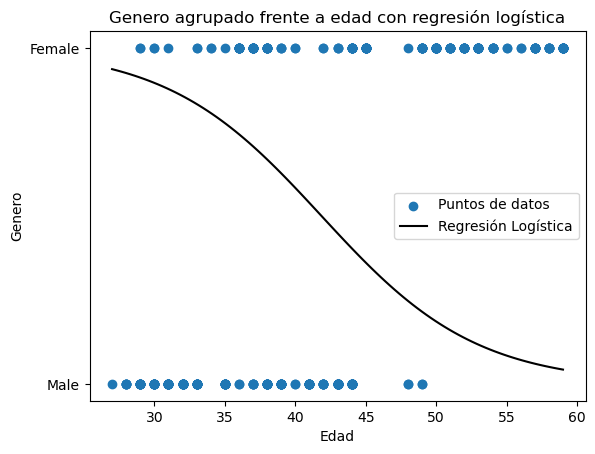

In [120]:
# Curva de regresión logística
x = np.linspace(X['Age'].min(), X['Age'].max(), 100).reshape(-1, 1)
x_df = pd.DataFrame({'Age': x[:, 0]})
x_scaled = scaler.transform(x_df)
y_prob = modelo.predict_proba(x_scaled)[:, 1]

# Puntos con regresión logística
plt.scatter(reglog['Age'], reglog['Gender'], label='Puntos de datos')
plt.plot(x, y_prob, color='black', label='Regresión Logística')
plt.xlabel('Edad')
plt.ylabel('Genero')
plt.title('Genero agrupado frente a edad con regresión logística')
plt.legend()
plt.show()
